In [60]:
from src.utils import *
from latinexpansion import grade, eLHS
import numpy as np
from scipy.stats.qmc import LatinHypercube
from src.fancyplotter import usePlotSampleSet
import json

LHS = LatinHypercube(2)

with open('./data/presentationss.json', 'r') as f:
    ss = np.array(json.load(f))

N = 4

In [ ]:
# with open("./data/presentationss.json", "w") as f:
#     json.dump(ss2.tolist(), f)

In [80]:
def plotter(
        ss,
        Ntot: int,
        grid: bool = True, grid_c: str =  "black",
        interval_labels: bool = True, caption: str = None,
        save: bool = False, filename: str = None, highlight: bool = False, 
        overlaps: bool = False, voids: bool = False, plot:bool = True
    ):
        fig, ax = plt.subplots()
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
        ax.scatter(ss[:, 0], ss[:, 1], marker="o", c="red", s=40)

        if grid:
            for q in range(0, Ntot):
                ax.axhline(y=q/Ntot, color=grid_c, linestyle='-', linewidth=.8)
                ax.axvline(x=q/Ntot, color=grid_c, linestyle='-', linewidth=.8)

        # ticks are place in the middle of the interval
        xticks = yticks = np.arange(0, 1, 1/Ntot) + 1/(2*Ntot)
        xlabels = ylabels = np.arange(1, Ntot+1, 1)
        ax.set_xticks(xticks)
        ax.set_xticklabels(xlabels)
        ax.set_yticks(yticks)
        ax.set_yticklabels(ylabels)
        ax.tick_params(axis='both', which='both', length=0, width=0)

        # if caption is not None or caption != "":
        #     fig.suptitle(caption, x=0.5, y=0.935, fontsize=12, fontweight='bold')

        if plot:
            if save and filename is not None:
                fig.savefig("/Users/alessandro/Desktop/THESIS TEMP/IMAGES FOR PRESENTATION/" + filename, dpi=500, bbox_inches='tight')
            else:
                ax.plot()
        else:
            return fig, ax
        

In [ ]:

myplot = usePlotSampleSet(ss,grid=True, interval_labels=True, s=40)
myplot()

[]

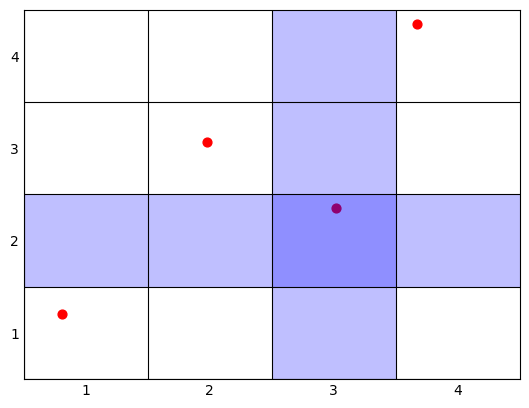

In [82]:
fig, ax = plotter(ss, N, plot = False, filename="LHS-1.png", save=False)


ax.axvspan(2/N, 3/N, facecolor="blue", alpha=.25)
ax.axhspan(1/N, 2/N, facecolor="blue", alpha=.25)

fig.savefig("/Users/alessandro/Desktop/THESIS TEMP/IMAGES FOR PRESENTATION/" + "LHS-1.png", dpi=500, bbox_inches='tight')
ax.plot()

In [ ]:
pippo = LHS.random(10)
exp = np.concatenate((pippo, eLHS(pippo, 5)))


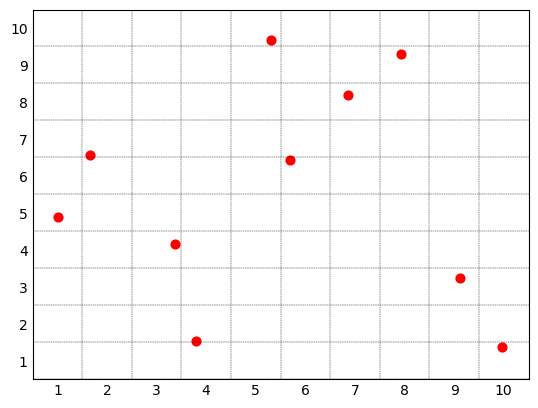

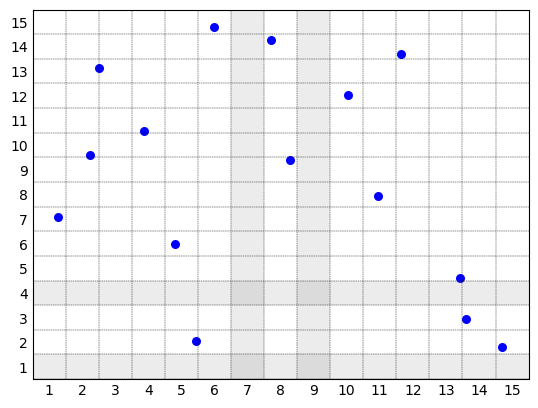

In [104]:

myplot(pippo, c="blue")
myplot(exp, voids=True, s=30, c="blue")